In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
dataset = pd.read_csv('/content/drive/MyDrive/Semester 7 writings/Zameen Property Data.csv')

In [116]:
from pre_poccess import pre_poccess
data = pre_poccess(dataset)
data.head(5)

145742


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/content/pre_poccess.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_z_score'][dataset['purpose'] == 'For Sale'] = z_score
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

date done
145618
pre-poccessed successfully.


,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,unique_location,price_per_area,price_z_score
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,100.0,For Sale,2,2019-02-04,Individual,G-10 Islamabad,100000.000000,0.031679
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,140.0,For Sale,3,2019-05-04,Individual,E-11 Islamabad,49285.714286,-0.194502
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,200.0,For Sale,5,2019-07-17,Individual,G-15 Islamabad,82500.000000,-0.046369
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,1000.0,For Sale,4,2019-04-05,Individual,Bani Gala Islamabad,43500.000000,-0.220306
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,200.0,For Sale,3,2019-07-10,Easy Property,DHA Defence Islamabad,35000.000000,-0.258215


In [117]:
# data.drop(['price_per_area','price_z_score'], axis=1, inplace=True)

farm_indexNames = data[data['property_type'] == "Farm House"].index
data.drop(farm_indexNames , inplace=True)

pent_indexNames = data[data['property_type'] == "Penthouse"].index
data.drop(pent_indexNames , inplace=True)

room_indexNames = data[data['property_type'] == "Room"].index
data.drop(room_indexNames , inplace=True)

data_null = data.isna().sum()
print(data_null)

property_type      0
price              0
location           0
city               0
province_name      0
latitude           0
longitude          0
baths              0
area               0
purpose            0
bedrooms           0
date_added         0
agency             0
unique_location    0
price_per_area     0
price_z_score      0
dtype: int64


In [118]:
numer = set(data.corr()['price'].index)
categ = list(set(data.columns) - set(data.corr()['price'].index))
print('numerical: ',numer)
print('categorical: ',categ)

numerical:  {'baths', 'price_z_score', 'bedrooms', 'area', 'latitude', 'price_per_area', 'price', 'longitude'}
categorical:  ['property_type', 'agency', 'purpose', 'date_added', 'province_name', 'location', 'unique_location', 'city']


In [119]:
data_log = data.copy()
# data_log.drop(data.price_z_score)
# data_log = data_log[(data_log.T != 0).any()]
data_log = data_log [(data_log  != 0).all(1)]

for i in numer:
    data_log[i] = np.log(data_log[i])
print(data_log.head(5))
# data_log['chalja'] = np.log(data_log['price'])
# print(data_log['chalja'])

print('unique cities are: ', data.city.unique())
data_isl = data_log[data_log['city'] == "Islamabad"]
data_lhr = data_log[data_log['city'] == "Lahore"]
data_fsl = data_log[data_log['city'] == "Faisalabad"]
data_rwl = data_log[data_log['city'] == "Rawalpindi"]
data_khi = data_log[data_log['city'] == "Karachi"]

  property_type      price  ... price_per_area price_z_score
0          Flat  16.118096  ...      11.512925     -3.452091
1          Flat  15.747032  ...      10.805390           NaN
2         House  16.618871  ...      11.320554           NaN
3         House  17.588271  ...      10.680516           NaN
4         House  15.761421  ...      10.463103           NaN

[5 rows x 16 columns]
unique cities are:  ['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [120]:
def kmeans(input_data, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(input_data)
    km = KMeans(n_clusters=n_clusters)
    km.fit(input_data)
    y_pred = km.predict(input_data)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X[:,0], X[:,1],c=y_pred, s=50)
    ax.set_xlim(-3,3)
    ax.set_xlabel(input_data.columns[0])
    ax.set_ylabel(input_data.columns[1])
    ax.set_title("K-means")
    plt.colorbar(scatter)
    print('distance of each model from its centroid: ',km.inertia_)
    return y_pred, km.cluster_centers_

distance of each model from its centroid:  96360.38190290517


(array([0, 0, 0, ..., 0, 2, 0], dtype=int32),
 array([[15.86152099,  4.76670408],
        [10.9569844 ,  5.46104871],
        [17.38731648,  5.85166442]]))

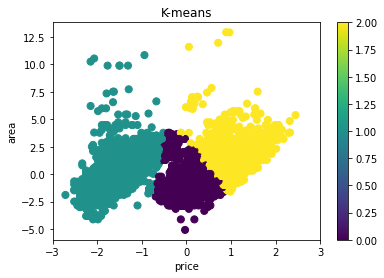

In [121]:
kmeans(data_log[['price', 'area']],3)

distance of each model from its centroid:  74477.09261970998


(array([0, 0, 2, ..., 0, 0, 0], dtype=int32),
 array([[15.81895406,  1.01548529],
        [10.94958163,  1.08340417],
        [17.34857158,  1.55891893]]))

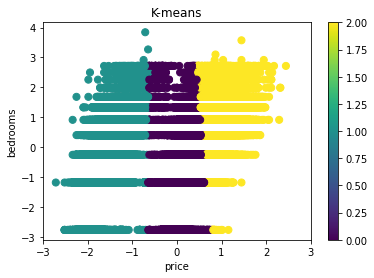

In [123]:
kmeans(data_log[['price', 'bedrooms']],3)

Islamabad
distance of each model from its centroid:  28803.11603039589


(array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([[11.07610115,  5.61649415],
        [15.90366212,  4.90721676],
        [17.59862707,  5.96848358]]))

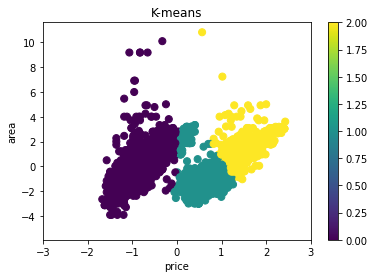

In [124]:
i = 0
cities = ['Islamabad','Lahore','Faisalabad','Rawalpindi','Karachi']

print(cities[i])
kmeans(data_isl[['price', 'area']],3)

Lahore
distance of each model from its centroid:  11449.461824494982


(array([2, 2, 1, ..., 1, 2, 2], dtype=int32),
 array([[15.52267705,  4.42597675],
        [16.61760038,  5.23854858],
        [17.68018977,  6.30110495]]))

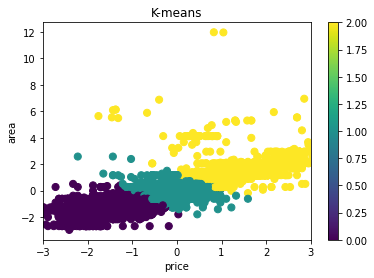

In [125]:
i = i+1
print(cities[i])
kmeans(data_lhr[['price', 'area']],3)

Faisalabad
distance of each model from its centroid:  1357.3185742765859


(array([0, 2, 0, ..., 0, 2, 1], dtype=int32),
 array([[15.62550306,  4.61217579],
        [10.39387793,  5.12882584],
        [16.90070404,  5.62151561]]))

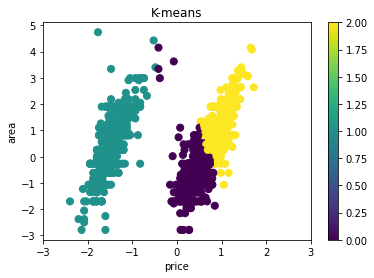

In [126]:
i = i+1
print(cities[i])
kmeans(data_fsl[['price', 'area']],3)

Rawalpindi
distance of each model from its centroid:  7119.522812227629


(array([0, 0, 0, ..., 0, 2, 2], dtype=int32),
 array([[16.87511005,  5.62646979],
        [10.47462624,  5.22752358],
        [15.59552027,  4.72409677]]))

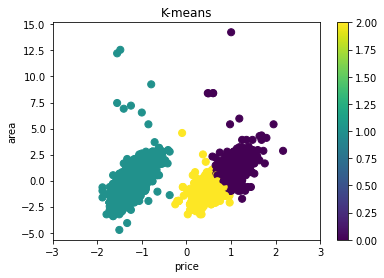

In [127]:
i = i+1
print(cities[i])
kmeans(data_rwl[['price', 'area']],3)

Karachi
distance of each model from its centroid:  37348.593134003044


(array([2, 2, 2, ..., 0, 2, 0], dtype=int32),
 array([[15.86698029,  4.80758718],
        [11.06810945,  5.38034621],
        [17.58230518,  5.73361104]]))

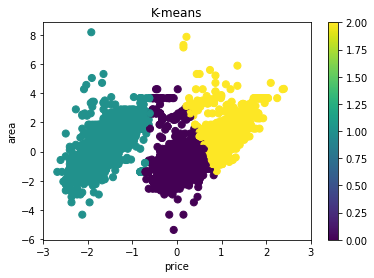

In [128]:
i = i+1
print(cities[i])
kmeans(data_khi[['price', 'area']],3)

In [129]:
# data_choose = data_log[['price', 'bedrooms', 'baths', 'area', 'price_per_area']]
data_group = data_log.groupby('unique_location').mean()
data_choose = data_group[['price', 'bedrooms', 'area', 'price_per_area']]
data_new_choose = data_group[['price', 'bedrooms', 'area']]

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [55.0, 55.0, 65.0, 65.0], [40.0, 40.0, 60.0, 60.0], [75.0, 75.0, 85.0, 85.0], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [80.0, 80.0, 102.5, 102.5], [50.0, 50.0, 91.25, 91.25], [135.0, 135.0, 145.0, 145.0], [125.0, 125.0, 140.0, 140.0], [155.0, 155.0, 165.0, 165.0], [132.5, 132.5, 160.0, 160.0], [70.625, 70.625, 146.25, 146.25], [12.5, 12.5, 108.4375, 108.4375], [175.0, 175.0, 185.0, 185.0], [215.0, 215.0, 225.0, 225.0], [205.0, 205.0, 220.0, 220.0], [195.0, 195.0, 212.5, 212.5], [180.0, 180.0, 203.75, 203.75], [265.0, 265.0, 275.0, 275.0], [255.0, 255.0, 270.0, 270.0], [245.0, 245.0, 262.5, 262.5], [235.0, 235.0, 253.75, 253.75], [191.875, 191.875, 244.375, 244.375], [305.0, 305.0, 315.0, 315.0], [295.0, 295.0, 310.0, 310.0], [285.0, 285.0, 302.5, 302.5], [218.125, 218.125, 293.75, 293.75], [60.46875, 60.46875, 255.9375, 255.9375], [345.0, 345.0, 355.0, 355.0], [335.0, 335.0, 350.0, 

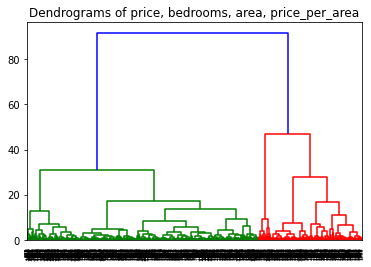

In [161]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area, price_per_area")  
dend = shc.dendrogram(shc.linkage(data_choose, method='ward'))
print(dend)

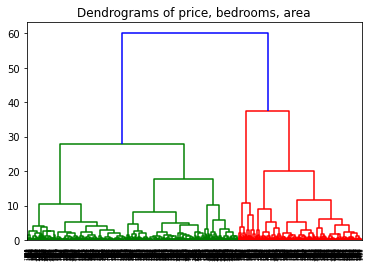

In [131]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area")  
dend = shc.dendrogram(shc.linkage(data_new_choose, method='ward'))

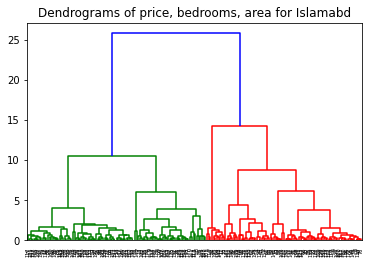

In [132]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area for Islamabd")  
dend = shc.dendrogram(shc.linkage(data_isl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']], method='ward'))

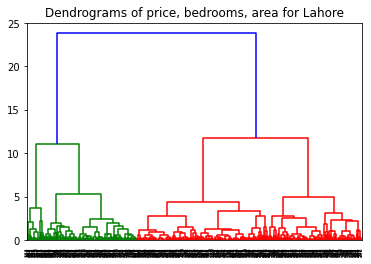

In [133]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area for Lahore")  
dend = shc.dendrogram(shc.linkage(data_lhr.groupby('unique_location').mean()[['price', 'bedrooms', 'area']], method='ward'))

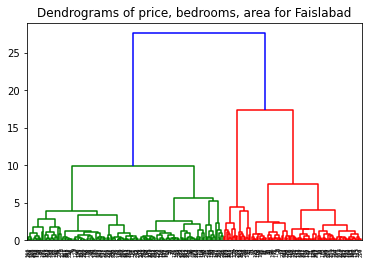

In [134]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area for Faislabad")  
dend = shc.dendrogram(shc.linkage(data_fsl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']], method='ward'))

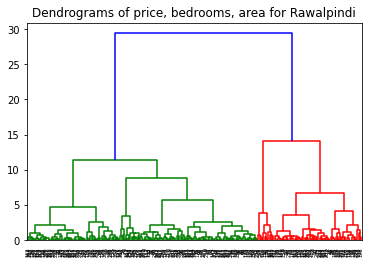

In [135]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area for Rawalpindi")  
dend = shc.dendrogram(shc.linkage(data_rwl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']], method='ward'))

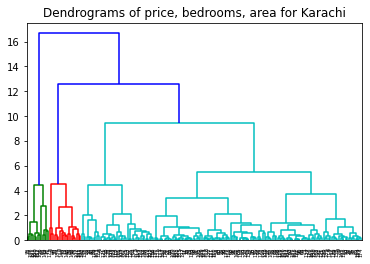

In [136]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area for Karachi")  
dend = shc.dendrogram(shc.linkage(data_khi.groupby('unique_location').mean()[['price', 'bedrooms', 'area']], method='ward'))

distance of each model from its centroid:  1239.1184772212714


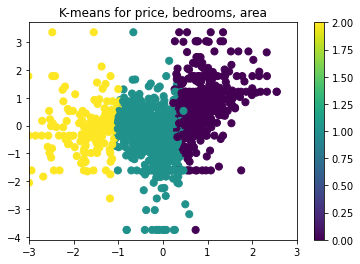

In [137]:
def kmeans(input_data, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(input_data)
    km = KMeans(n_clusters=n_clusters)
    km.fit(input_data)
    y_pred = km.predict(input_data)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X[:,0], X[:,1],c=y_pred, s=50)
    ax.set_xlim(-3,3)
    # ax.set_xlabel(input_data.columns[0])
    # ax.set_ylabel(input_data.columns[1])
    ax.set_title("K-means for price, bedrooms, area")
    plt.colorbar(scatter)
    print('distance of each model from its centroid: ',km.inertia_)
    return y_pred, km.cluster_centers_
labels, centroids = kmeans(data_new_choose,3)

In [138]:
data_new_choose['kmeans_all'] = labels

print('cluster 1')
data_new_choose[data_new_choose['kmeans_all'] == 0].describe()

cluster 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,bedrooms,area,kmeans_all
count,584.000000,584.000000,584.000000,584.0
mean,16.429786,1.402672,5.213599,0.0
std,0.572941,0.281979,0.547650,0.0
min,15.552858,0.000000,4.212128,0.0
25%,16.021650,1.240730,4.828314,0.0
50%,16.303455,1.386294,5.070190,0.0
75%,16.677711,1.550677,5.521461,0.0
max,19.008467,2.302585,7.980714,0.0


In [139]:
print('cluster 2')
data_new_choose[data_new_choose['kmeans_all'] == 1].describe()

cluster 2


,price,bedrooms,area,kmeans_all
count,728.000000,728.000000,728.000000,728.0
mean,15.017351,1.086810,4.783369,1.0
std,0.582656,0.284404,0.442373,0.0
min,13.612422,0.000000,3.218876,1.0
25%,14.604043,0.952489,4.494659,1.0
50%,15.127437,1.107298,4.742386,1.0
75%,15.503450,1.253868,5.004098,1.0
max,16.087654,2.302585,7.313220,1.0


In [140]:
print('cluster 3')
data_new_choose[data_new_choose['kmeans_all'] == 2].describe()

cluster 3


,price,bedrooms,area,kmeans_all
count,194.000000,194.000000,194.000000,194.0
mean,12.235290,1.139172,5.159429,2.0
std,1.240070,0.316580,0.569061,0.0
min,9.210340,0.000000,3.806662,2.0
25%,11.482436,0.960180,4.789708,2.0
50%,12.632731,1.143629,5.025479,2.0
75%,13.206277,1.292245,5.521461,2.0
max,13.748745,2.302585,7.438384,2.0


Kmeans of price, bedrooms, area for Islamabd
distance of each model from its centroid:  193.58305575245498


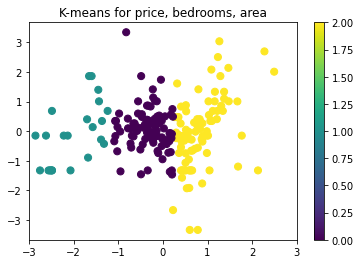

In [151]:
print("Kmeans of price, bedrooms, area for Islamabd")
labels, centroids = kmeans(data_isl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],3)

Kmeans of price, bedrooms, area for Lahore
distance of each model from its centroid:  168.9103046381676


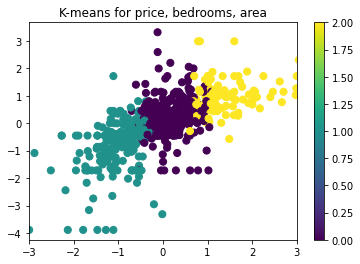

In [153]:
print("Kmeans of price, bedrooms, area for Lahore")
labels, centroids = labels, centroids = kmeans(data_lhr.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],3)

Kmeans of price, bedrooms, area for Rawalpindi
distance of each model from its centroid:  201.63849913705826


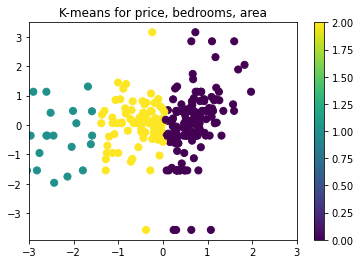

In [154]:
print("Kmeans of price, bedrooms, area for Rawalpindi")
labels, centroids = kmeans(data_fsl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],3)

Kmeans of price, bedrooms, area for Faislabad
distance of each model from its centroid:  201.63849913705826


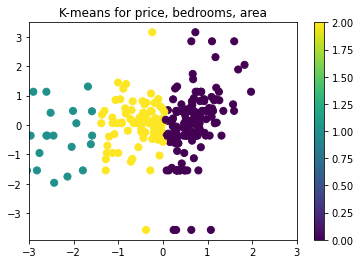

In [155]:
print("Kmeans of price, bedrooms, area for Faislabad")
labels, centroids = kmeans(data_fsl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],3)

Kmeans of price, bedrooms, area for Karachi
distance of each model from its centroid:  130.01613352409726


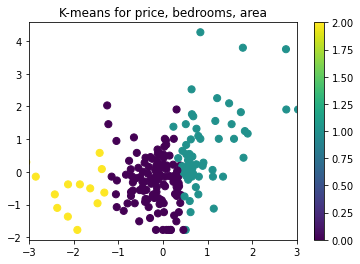

In [156]:
df_khi_group_choose = data_khi.groupby('unique_location').mean()[['price', 'bedrooms', 'area']]
print("Kmeans of price, bedrooms, area for Karachi")
labels, centroids = kmeans(df_khi_group_choose,3)

In [158]:
df_khi_group_choose['kmeans_khi'] = labels
print('cluster 1')
df_khi_group_choose[df_khi_group_choose['kmeans_khi'] == 0].describe()

cluster 1


,price,bedrooms,area,kmeans_khi
count,119.000000,119.000000,119.000000,119.0
mean,15.040204,1.066121,4.926361,0.0
std,0.499892,0.188223,0.401701,0.0
min,13.716192,0.693147,4.155154,0.0
25%,14.738801,0.951588,4.650096,0.0
50%,15.122472,1.079869,4.836187,0.0
75%,15.397481,1.176901,5.162356,0.0
max,15.830414,1.640382,6.471626,0.0


In [159]:
print('cluster 2')
df_khi_group_choose[df_khi_group_choose['kmeans_khi'] == 1].describe()

cluster 2


,price,bedrooms,area,kmeans_khi
count,63.000000,63.000000,63.000000,63.0
mean,16.407973,1.300800,5.222599,1.0
std,0.736430,0.284678,0.501873,0.0
min,15.552858,0.693147,4.349757,1.0
25%,15.966035,1.133555,4.822850,1.0
50%,16.079554,1.239288,5.187773,1.0
75%,16.660331,1.454086,5.480620,1.0
max,19.008467,2.197225,6.856462,1.0


In [160]:
print('cluster 3')
df_khi_group_choose[df_khi_group_choose['kmeans_khi'] == 2].describe()

cluster 3


,price,bedrooms,area,kmeans_khi
count,16.000000,16.000000,16.000000,16.0
mean,12.381457,0.994200,4.869464,2.0
std,1.124142,0.171383,0.493033,0.0
min,9.680344,0.693147,3.806662,2.0
25%,11.670162,0.887086,4.672685,2.0
50%,12.628354,1.024530,4.904802,2.0
75%,13.296643,1.098612,5.139615,2.0
max,13.637270,1.279237,5.624536,2.0


[ 0  1 -1 ...  1  1  0]


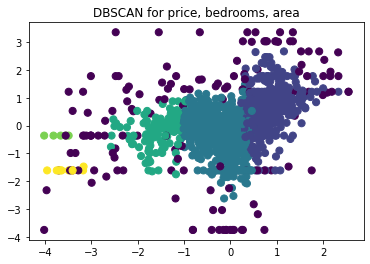

In [169]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, s=50)
    plt.title("DBSCAN for price, bedrooms, area")
    return y_pred
db_label = dbscan(data_new_choose,.5,5)
print(db_label)

In [171]:
np.unique(db_label)

array([-1,  0,  1,  2,  3,  4])

In [173]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 1')
data_new_choose[data_new_choose['dbscan_cluster'] == -1].describe()

cluster 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,139.000000,139.000000,139.000000,139.000000,139.0
mean,14.217495,1.273882,5.430218,1.086331,-1.0
std,2.651811,0.690070,0.995368,0.872129,0.0
min,9.210340,0.000000,3.218876,0.000000,-1.0
25%,11.746559,0.693147,4.633675,0.000000,-1.0
50%,14.649692,1.448052,5.358942,1.000000,-1.0
75%,16.194036,1.791759,6.140692,2.000000,-1.0
max,19.008467,2.302585,7.980714,2.000000,-1.0


In [174]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 2')
data_new_choose[data_new_choose['dbscan_cluster'] == -0].describe()

cluster 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,537.000000,537.000000,537.000000,537.0,537.0
mean,16.372068,1.375065,5.146688,0.0,0.0
std,0.472661,0.224814,0.438757,0.0,0.0
min,15.552858,0.693147,4.317488,0.0,0.0
25%,16.014276,1.234757,4.828314,0.0,0.0
50%,16.286130,1.378741,5.041545,0.0,0.0
75%,16.625305,1.511001,5.418833,0.0,0.0
max,18.683045,2.079442,6.561182,0.0,0.0


In [175]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 3')
data_new_choose[data_new_choose['dbscan_cluster'] == 1].describe()

cluster 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,695.000000,695.000000,695.000000,695.0,695.0
mean,15.024050,1.101964,4.783496,1.0,1.0
std,0.579980,0.223755,0.403014,0.0,0.0
min,13.612422,0.366204,3.768182,1.0,1.0
25%,14.606695,0.966659,4.511184,1.0,1.0
50%,15.136003,1.112965,4.746188,1.0,1.0
75%,15.509858,1.251014,4.991273,1.0,1.0
max,15.958938,1.691725,6.593907,1.0,1.0


In [176]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 4')
data_new_choose[data_new_choose['dbscan_cluster'] == 2].describe()

cluster 4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,119.000000,119.000000,119.000000,119.0,119.0
mean,12.888780,1.150000,5.119301,2.0,2.0
std,0.558198,0.183127,0.404143,0.0,0.0
min,11.359711,0.647652,4.382438,2.0,2.0
25%,12.573869,1.046055,4.811168,2.0,2.0
50%,12.985145,1.183515,5.001498,2.0,2.0
75%,13.309586,1.268840,5.455711,2.0,2.0
max,13.748745,1.497866,6.103036,2.0,2.0


In [177]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 5')
data_new_choose[data_new_choose['dbscan_cluster'] == 3].describe()

cluster 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,5.000000,5.000000,5.000000,5.0,5.0
mean,9.672808,1.098612,4.914670,2.0,3.0
std,0.317949,0.000000,0.145783,0.0,0.0
min,9.210340,1.098612,4.828314,2.0,3.0
25%,9.510445,1.098612,4.828314,2.0,3.0
50%,9.740969,1.098612,4.828314,2.0,3.0
75%,9.903488,1.098612,4.923624,2.0,3.0
max,9.998798,1.098612,5.164786,2.0,3.0


In [178]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 6')
data_new_choose[data_new_choose['dbscan_cluster'] == 4].describe()

cluster 6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,11.000000,11.000000,11.000000,11.0,11.0
mean,9.945181,0.697224,4.644777,2.0,4.0
std,0.360757,0.013520,0.199577,0.0,0.0
min,9.305651,0.693147,4.317488,2.0,4.0
25%,9.710656,0.693147,4.515995,2.0,4.0
50%,9.998798,0.693147,4.653960,2.0,4.0
75%,10.126631,0.693147,4.828314,2.0,4.0
max,10.479855,0.737988,4.828314,2.0,4.0


DBSCAN of price, bedrooms, area for Islamabd


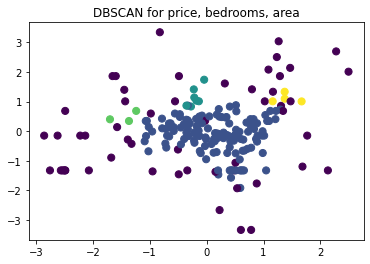

In [180]:
print("DBSCAN of price, bedrooms, area for Islamabd")
db_label = dbscan(data_isl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],.5,5)

DBSCAN of price, bedrooms, area for Lahore


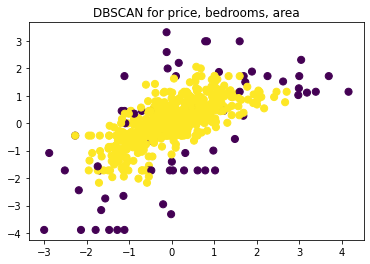

In [181]:
print("DBSCAN of price, bedrooms, area for Lahore")
db_label = dbscan(data_lhr.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],.5,5)

DBSCAN of price, bedrooms, area for Faislabad


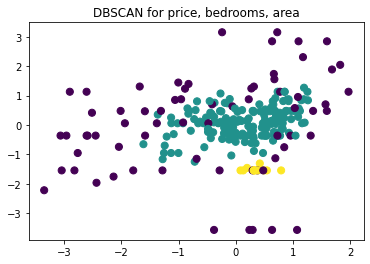

In [182]:
print("DBSCAN of price, bedrooms, area for Faislabad")
db_label = dbscan(data_fsl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],.5,5)

DBSCAN of price, bedrooms, area for Rawalpindi


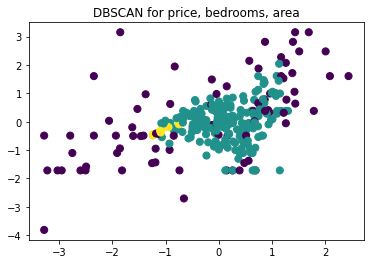

In [183]:
print("DBSCAN of price, bedrooms, area for Rawalpindi")
db_label = dbscan(data_rwl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],.5,5)

DBSCAN of price, bedrooms, area for Karachi


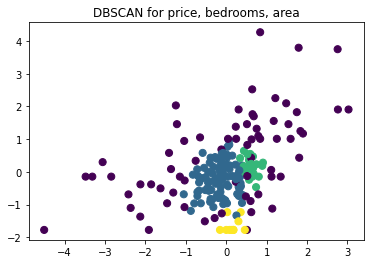

In [185]:
print("DBSCAN of price, bedrooms, area for Karachi")
db_label = dbscan(df_khi_group_choose,.5,5)

In [186]:
np.unique(db_label)

array([-1,  0,  1,  2])

In [189]:
df_khi_group_choose['db_clusters'] = db_label

print('cluster 1')
df_khi_group_choose[df_khi_group_choose['db_clusters'] == -1].describe()

cluster 1


,price,bedrooms,area,kmeans_khi,db_clusters
count,68.000000,68.000000,68.000000,68.000000,68.0
mean,15.193473,1.254827,5.163170,1.000000,-1.0
std,1.991430,0.339506,0.642419,0.691095,0.0
min,9.680344,0.693147,3.806662,0.000000,-1.0
25%,13.740607,1.001322,4.672685,1.000000,-1.0
50%,15.878555,1.242453,5.005017,1.000000,-1.0
75%,16.640905,1.483350,5.631646,1.000000,-1.0
max,19.008467,2.197225,6.856462,2.000000,-1.0


In [190]:
print('cluster 2')
df_khi_group_choose[df_khi_group_choose['db_clusters'] == 0].describe()

cluster 2


,price,bedrooms,area,kmeans_khi,db_clusters
count,93.000000,93.000000,93.000000,93.0,93.0
mean,15.068843,1.078867,4.924325,0.0,0.0
std,0.429363,0.123735,0.313535,0.0,0.0
min,13.958569,0.803008,4.281127,0.0,0.0
25%,14.767663,0.982423,4.719181,0.0,0.0
50%,15.114628,1.087871,4.854000,0.0,0.0
75%,15.354242,1.165723,5.160441,0.0,0.0
max,15.761842,1.375154,5.709899,0.0,0.0


In [191]:
print('cluster 1')
df_khi_group_choose[df_khi_group_choose['db_clusters'] == 1].describe()

cluster 1


,price,bedrooms,area,kmeans_khi,db_clusters
count,27.000000,27.000000,27.000000,27.0,27.0
mean,16.018284,1.177625,5.083758,1.0,1.0
std,0.162732,0.065955,0.262615,0.0,0.0
min,15.684887,1.018797,4.535668,1.0,1.0
25%,15.936502,1.133555,4.868058,1.0,1.0
50%,15.996452,1.178070,5.159001,1.0,1.0
75%,16.081503,1.228869,5.280266,1.0,1.0
max,16.385820,1.294778,5.515191,1.0,1.0


In [192]:
print('cluster 1')
df_khi_group_choose[df_khi_group_choose['db_clusters'] == 2].describe()

cluster 1


,price,bedrooms,area,kmeans_khi,db_clusters
count,10.000000,10.000000,10.000000,10.0,10.0
mean,15.453774,0.726719,4.685288,0.0,2.0
std,0.225941,0.057292,0.192063,0.0,0.0
min,15.068274,0.693147,4.449949,0.0,2.0
25%,15.309326,0.693147,4.564169,0.0,2.0
50%,15.452341,0.693147,4.642392,0.0,2.0
75%,15.596216,0.742202,4.781203,0.0,2.0
max,15.830414,0.828302,5.075174,0.0,2.0
